In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the dataset
df = pd.read_csv('./global_renewable_energy_production.csv')
df

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025
...,...,...,...,...,...,...,...
235,2019,Japan,346.649699,920.431403,1407.414660,423.383812,3097.879574
236,2020,Japan,285.779145,214.294577,532.705571,455.008389,1487.787682
237,2021,Japan,886.501070,976.637033,1320.878663,349.266504,3533.283269
238,2022,Japan,257.834151,1388.735530,1011.909892,222.412338,2880.891910


In [10]:
# Summary statistics
print(df.describe())

              Year  SolarEnergy   WindEnergy  HydroEnergy  \
count   240.000000   240.000000   240.000000   240.000000   
mean   2011.500000   528.523858   857.133260  1076.581975   
std       6.936653   271.183089   375.020314   499.981598   
min    2000.000000   104.555425   206.021630   320.662607   
25%    2005.750000   284.700505   523.572495   593.796081   
50%    2011.500000   533.436429   882.024084  1046.390380   
75%    2017.250000   766.701662  1160.199295  1495.160715   
max    2023.000000   996.973153  1487.070005  1983.858741   

       OtherRenewableEnergy  TotalRenewableEnergy  
count            240.000000            240.000000  
mean             287.127554           2749.366647  
std              128.460792            695.126957  
min               54.876943            910.381025  
25%              176.322725           2250.759951  
50%              291.398276           2815.458943  
75%              405.479393           3217.212712  
max              499.872953       

In [5]:
# Displaying the first 5 rows of the dataset
df.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


In [9]:
# Displaying the unique values of the 'Country' column
df['Country'].unique()

array(['USA', 'China', 'India', 'Germany', 'UK', 'France', 'Brazil',
       'Canada', 'Australia', 'Japan'], dtype=object)

In [ ]:
# Displaying the unique values of the 'Year' column
df['Year'].unique()

# Data Preprocessing

In [11]:
df.fillna(0, inplace=True)

# Handling inf values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Define the countries list
countries = ['USA', 'China', 'India', 'Germany', 'UK', 'France', 'Brazil', 'Canada', 'Australia', 'Japan']

# Visualizations

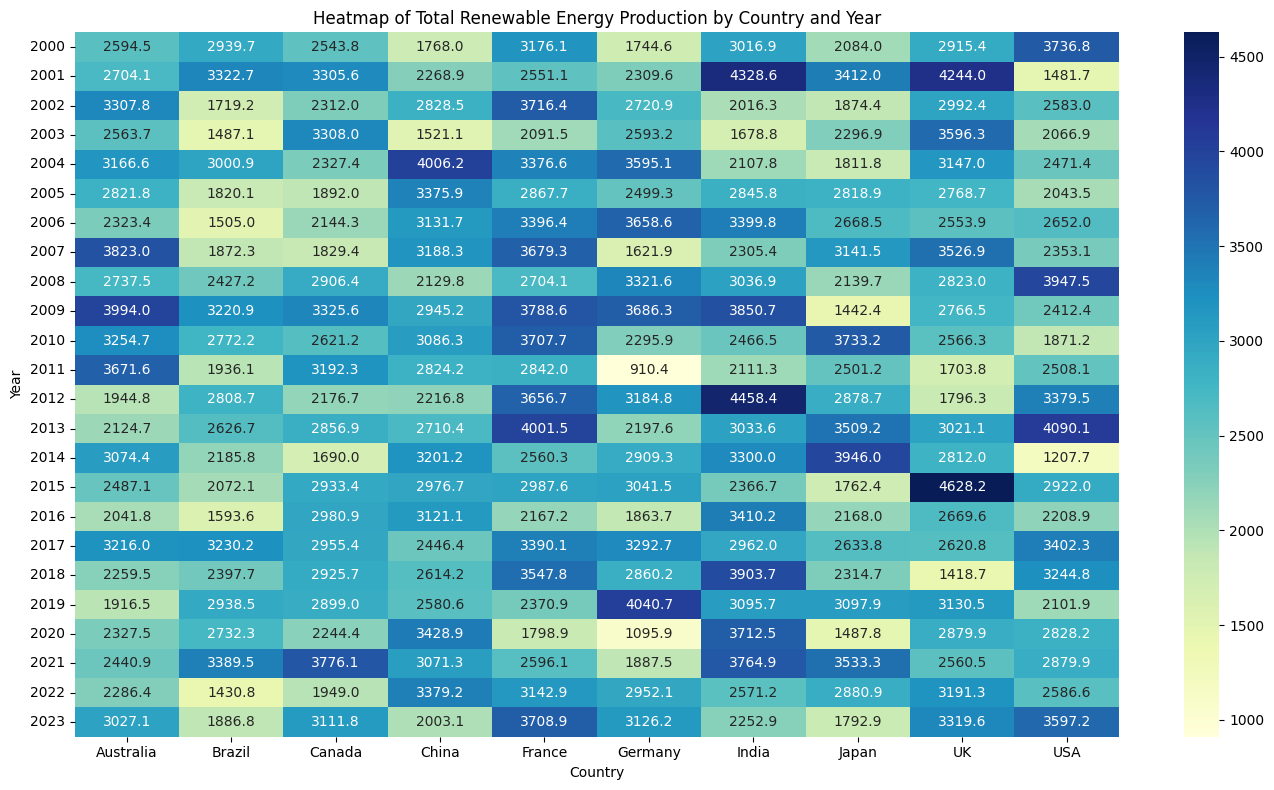

In [12]:
# 1. Heatmap of Renewable Energy Production by Country and Year
pivot_table = df.pivot_table(index='Year', columns='Country', values='TotalRenewableEnergy')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Heatmap of Total Renewable Energy Production by Country and Year')
plt.xlabel('Country')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

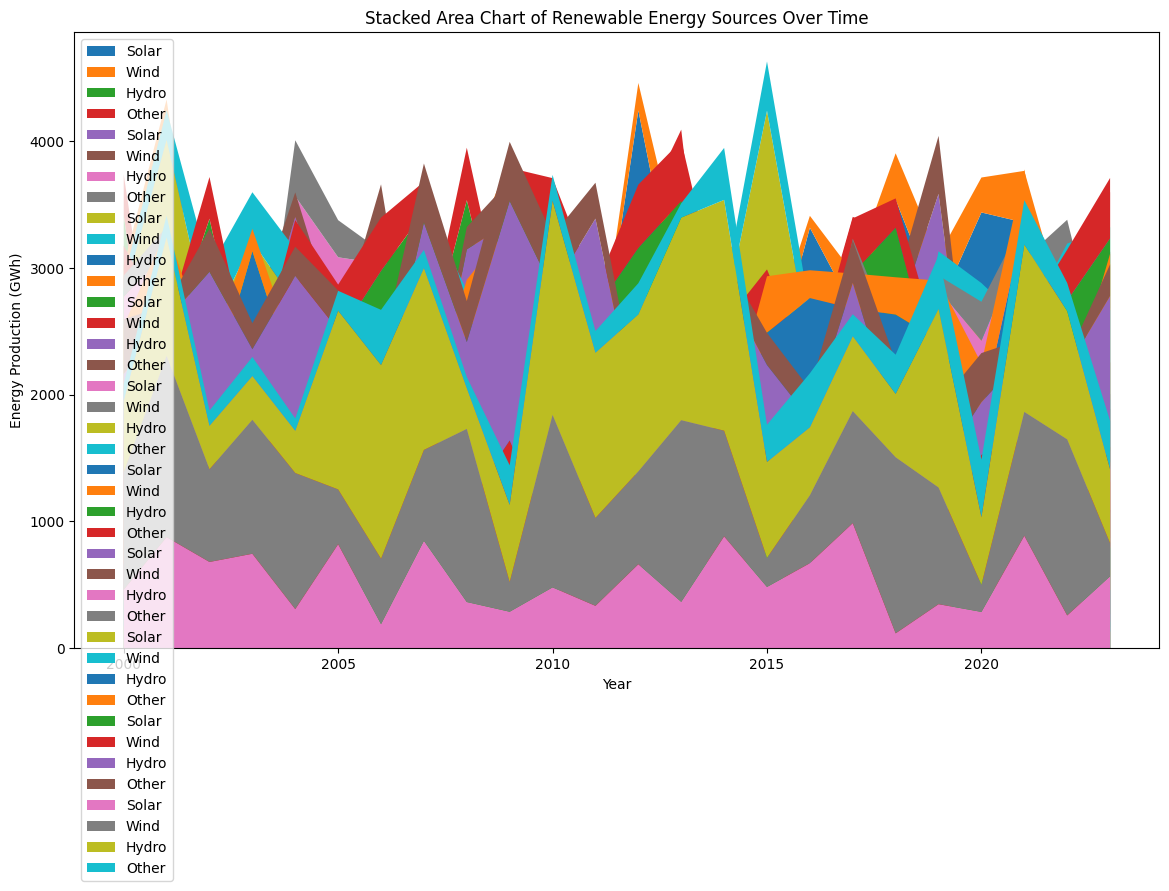

In [13]:
# 2. Stacked Area Chart of Renewable Energy Sources Over Time
plt.figure(figsize=(14, 8))
for country in countries:
    subset = df[df['Country'] == country]
    plt.stackplot(subset['Year'], subset['SolarEnergy'], subset['WindEnergy'], subset['HydroEnergy'], subset['OtherRenewableEnergy'], labels=['Solar', 'Wind', 'Hydro', 'Other'])
plt.title('Stacked Area Chart of Renewable Energy Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Production (GWh)')
plt.legend(loc='upper left')
plt.show()

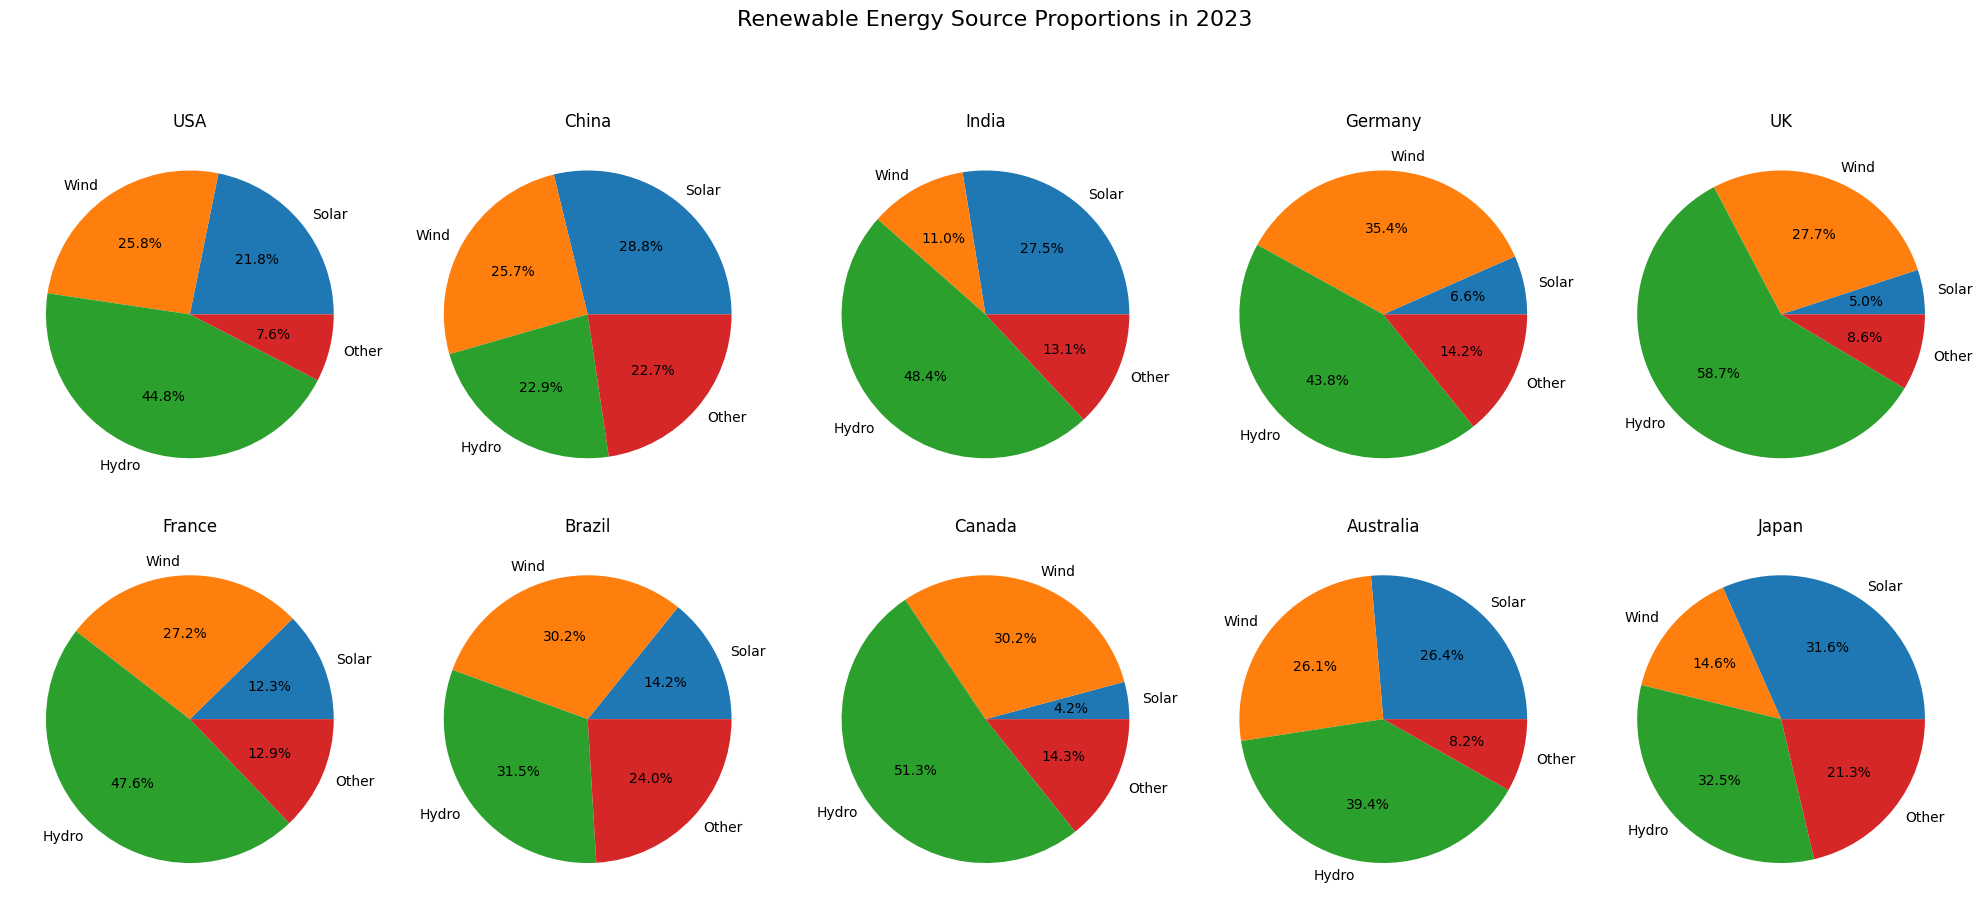

In [15]:
# 3. Pie Charts for the Proportion of Renewable Energy Sources for a Specific Year
specific_year = 2023
data_specific_year = df[df['Year'] == specific_year]

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle(f'Renewable Energy Source Proportions in {specific_year}', fontsize=16)

for i, country in enumerate(countries):
    ax = axs[i // 5, i % 5]
    subset = data_specific_year[data_specific_year['Country'] == country]
    sizes = [subset['SolarEnergy'].values[0], subset['WindEnergy'].values[0], subset['HydroEnergy'].values[0], subset['OtherRenewableEnergy'].values[0]]
    ax.pie(sizes, labels=['Solar', 'Wind', 'Hydro', 'Other'], autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

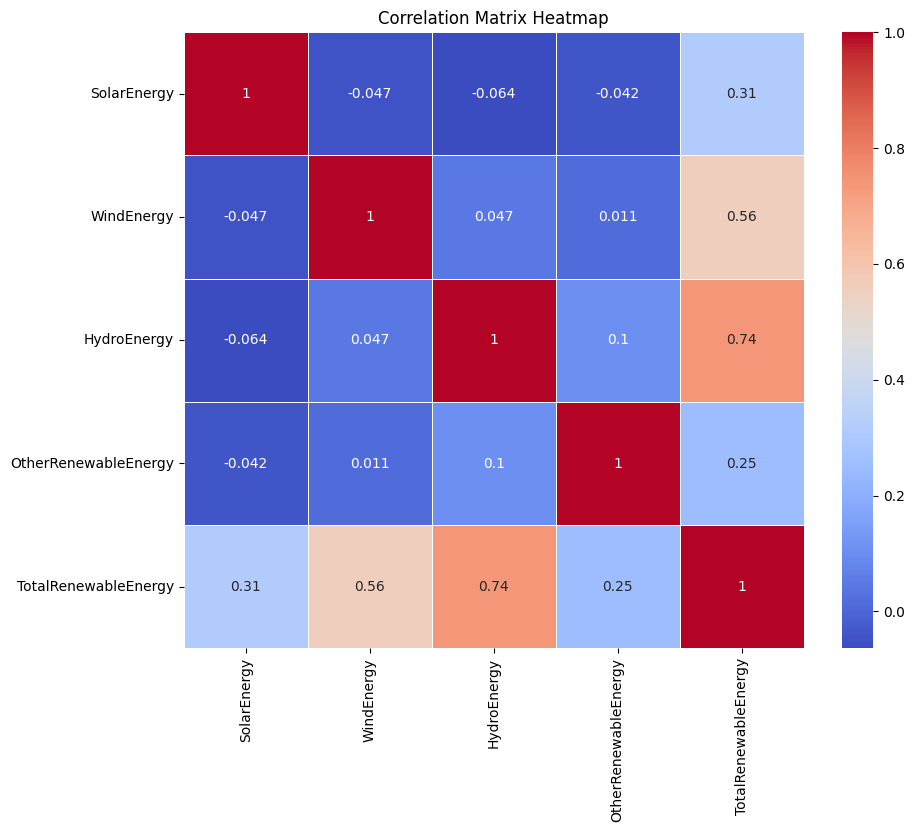

In [16]:
# 4. Correlation Matrix Heatmap
corr_matrix = df[['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Exploratory Data Analysis (EDA)

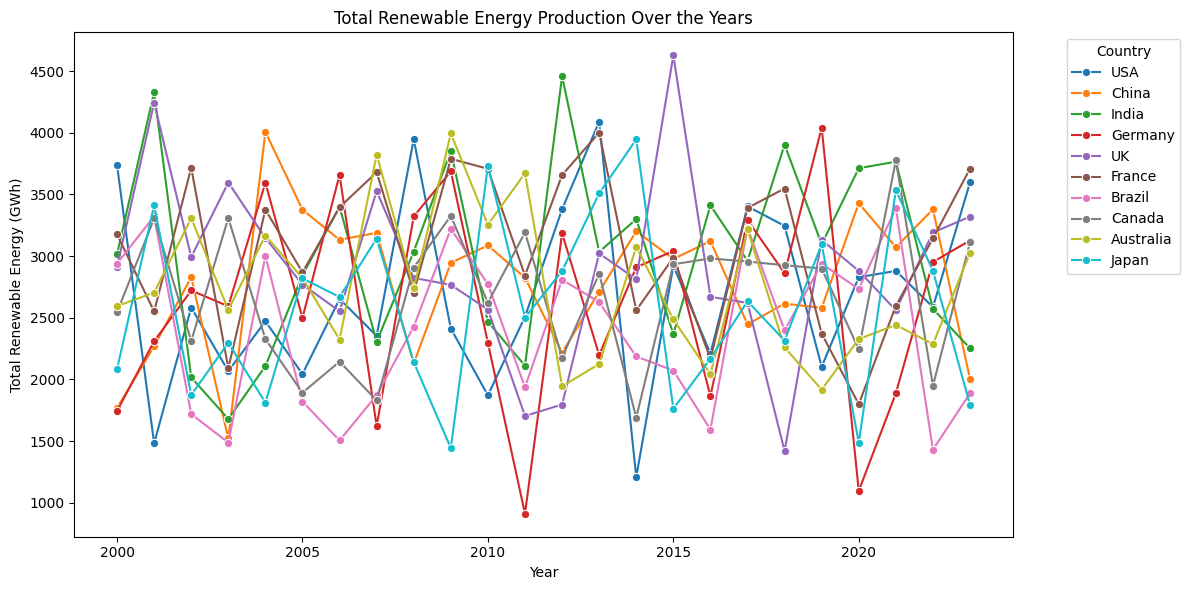

In [17]:
# Plotting the trend of total renewable energy production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='TotalRenewableEnergy', hue='Country', marker='o')
plt.title('Total Renewable Energy Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy (GWh)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

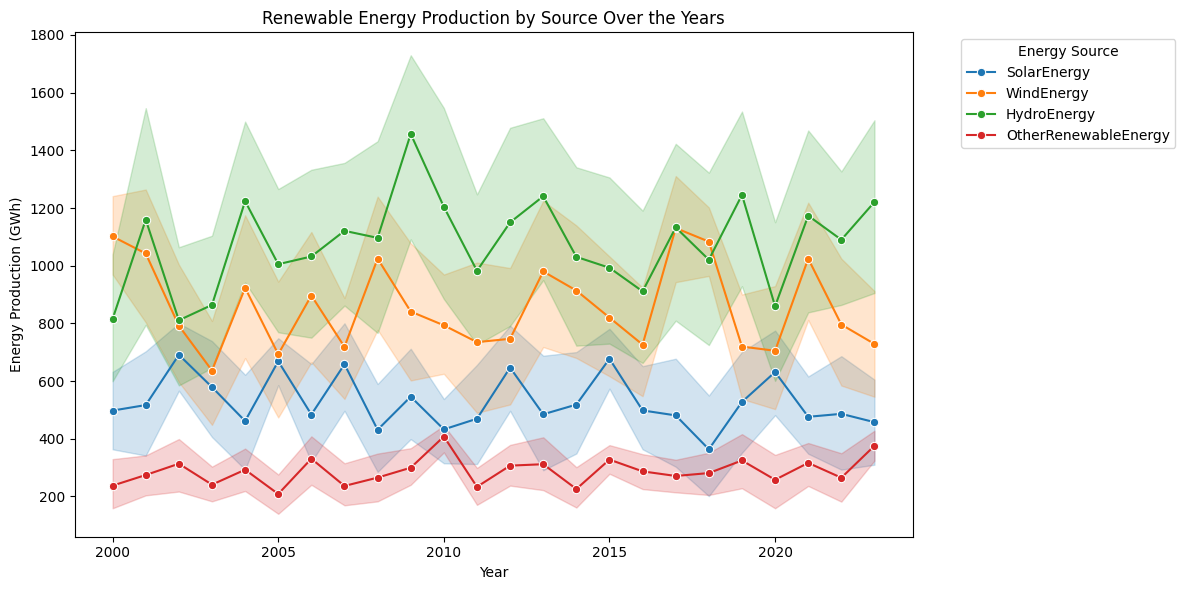

In [18]:
# Analysis of renewable energy sources
renewable_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy']
data_long = df.melt(id_vars=['Year', 'Country'], value_vars=renewable_sources, var_name='EnergySource', value_name='EnergyProduction')

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_long, x='Year', y='EnergyProduction', hue='EnergySource', marker='o')
plt.title('Renewable Energy Production by Source Over the Years')
plt.xlabel('Year')
plt.ylabel('Energy Production (GWh)')
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/bd/tsbt311j74dd9vr3q6pjs6x80000gn/T/ipykernel_15719/2924748851.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_top_countries, x='Country', y='TotalRenewableEnergy', estimator=sum, ci=None)


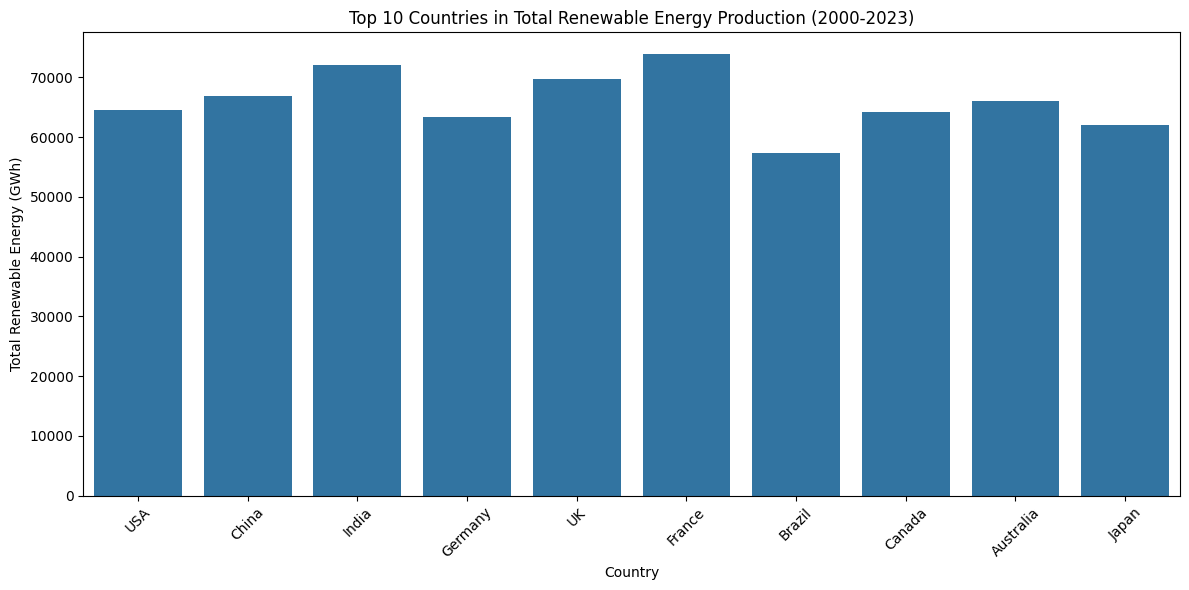

In [19]:
# Top countries in renewable energy production
top_countries = df.groupby('Country')['TotalRenewableEnergy'].sum().nlargest(10).index
data_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(data=data_top_countries, x='Country', y='TotalRenewableEnergy', estimator=sum, ci=None)
plt.title('Top 10 Countries in Total Renewable Energy Production (2000-2023)')
plt.xlabel('Country')
plt.ylabel('Total Renewable Energy (GWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series

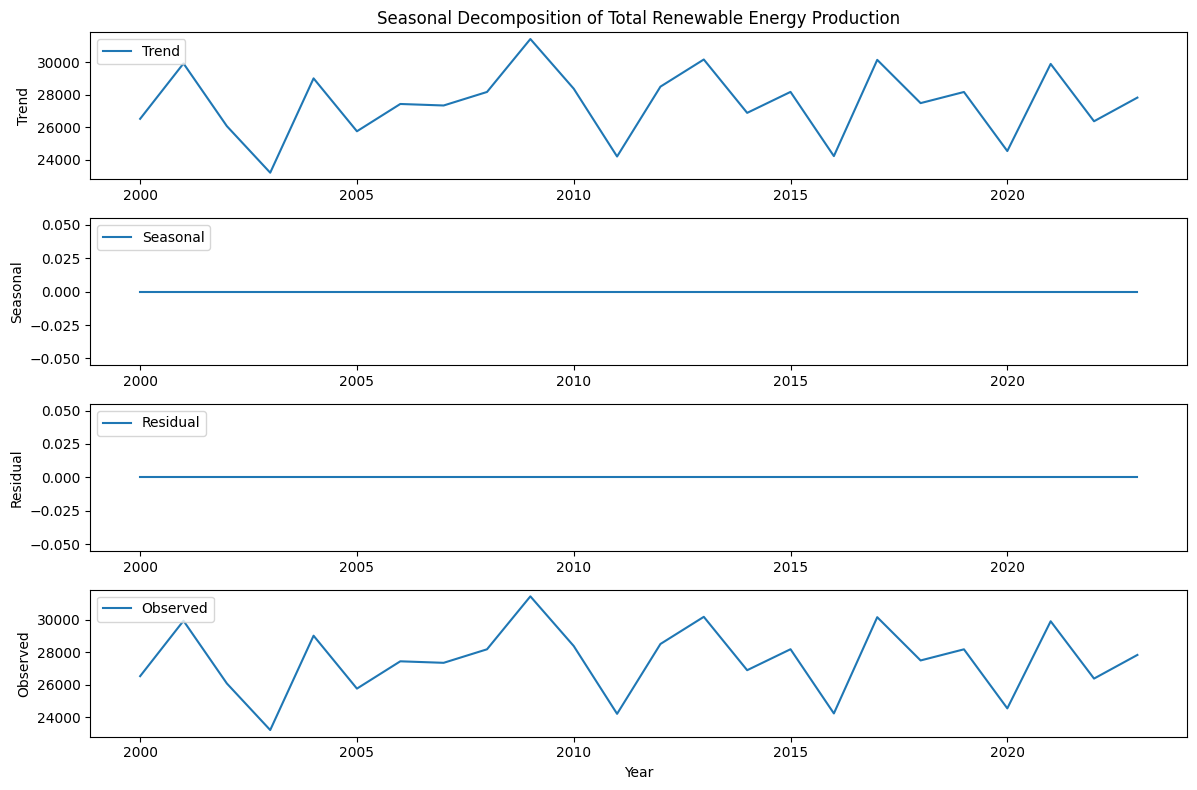

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series decomposition of total renewable energy production
decomposition = seasonal_decompose(df.groupby('Year')['TotalRenewableEnergy'].sum(), model='additive', period=1)
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.title('Seasonal Decomposition of Total Renewable Energy Production')
plt.ylabel('Trend')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.ylabel('Seasonal')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.ylabel('Residual')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.observed, label='Observed')
plt.xlabel('Year')
plt.ylabel('Observed')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()